# Data Preparation

In [25]:
import pandas as pd
import numpy as np

In [26]:
df  = pd.read_csv("D:\Portfolio\Valorant\Data - Player Statistics.csv")

In [27]:
df.head(10)

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,Keznit,Chile,KRÜ Esports,"['Raze', 'Jett']",4,79,70,21,1.12,1.42,266,19.7,17.5,5.2
1,Whz,China,Bilibili Gaming,"['Raze', 'Jett']",11,212,181,41,1.17,1.39,254,19.2,16.4,3.7
2,Demon1,United States,Evil Geniuses,"['Jett', 'Astra', 'Chamber']",21,421,302,80,1.39,1.65,246,20.0,14.3,3.8
3,Aspas,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
4,Jinggg,Singapore,Paper Rex,"['Raze', 'Phoenix']",16,285,279,92,1.02,1.35,234,17.8,17.4,5.7
5,Ardiis,Latvia,NRG,"['Jett', 'Chamber', 'Killjoy']",6,106,94,22,1.12,1.36,232,17.6,15.6,3.6
6,Alfajer,Turkey,Fnatic,"['Killjoy', 'Cypher', 'Chamber']",14,233,168,36,1.38,1.60,232,16.6,12.0,2.5
7,AAAAY,China,FunPlus Phoenix,"['Skye', 'Gekko']",4,76,57,16,1.33,1.61,231,19.0,14.2,4.0
8,Sayaplayer,South Korea,T1,"['Jett', 'Raze']",6,105,94,15,1.11,1.27,230,17.5,15.6,2.5
9,Jawgemo,Cambodia,Evil Geniuses,"['Raze', 'Omen', 'Astra']",21,362,325,154,1.11,1.58,228,17.2,15.4,7.3


In [28]:
df.dtypes

Player      object
Country     object
Team        object
Agents      object
Maps         int64
K            int64
D            int64
A            int64
KD         float64
KDA        float64
ACS/Map      int64
K/Map      float64
D/Map      float64
A/Map      float64
dtype: object

# Data Cleaning

In [29]:
# Replace other potential representations of missing values
df.replace(["N/A", "NA", "null", "-", "0"], np.nan, inplace=True)

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values count for each column
print("Missing values count for each column:")
print(missing_values)

Missing values count for each column:
Player     0
Country    0
Team       0
Agents     0
Maps       0
K          0
D          0
A          0
KD         0
KDA        0
ACS/Map    0
K/Map      0
D/Map      0
A/Map      0
dtype: int64


## Data Consistency

In [30]:
# Convert a specific column to uppercase
uppercase = ['Team', 'Player']
df[uppercase] = df[uppercase].apply(lambda x: x.str.upper())
lowercase = ['Country', 'Agents']
df[lowercase] = df[lowercase].apply(lambda x: x.str.lower())

# Print the modified DataFrame
print(df)

       Player         Country             Team  \
0      KEZNIT           chile      KRÜ ESPORTS   
1         WHZ           china  BILIBILI GAMING   
2      DEMON1   united states    EVIL GENIUSES   
3       ASPAS          brazil             LOUD   
4      JINGGG       singapore        PAPER REX   
..        ...             ...              ...   
75        RIN           china  BILIBILI GAMING   
76        TZH           china  FUNPLUS PHOENIX   
77    SOULCAS  united kingdom      TEAM LIQUID   
78  SUGARZ3RO           japan    ZETA DIVISION   
79       CROW           japan    ZETA DIVISION   

                              Agents  Maps    K    D   A    KD   KDA  ACS/Map  \
0                   ['raze', 'jett']     4   79   70  21  1.12  1.42      266   
1                   ['raze', 'jett']    11  212  181  41  1.17  1.39      254   
2       ['jett', 'astra', 'chamber']    21  421  302  80  1.39  1.65      246   
3                   ['raze', 'jett']    24  446  355  82  1.25  1.48      2

In [31]:
# Remove the word from the 'Text' column
df['Player'] = df['Player'].str.replace(r'\([^)]*\)', '', regex=True)

print(df)

       Player         Country             Team  \
0      KEZNIT           chile      KRÜ ESPORTS   
1         WHZ           china  BILIBILI GAMING   
2      DEMON1   united states    EVIL GENIUSES   
3       ASPAS          brazil             LOUD   
4      JINGGG       singapore        PAPER REX   
..        ...             ...              ...   
75        RIN           china  BILIBILI GAMING   
76        TZH           china  FUNPLUS PHOENIX   
77    SOULCAS  united kingdom      TEAM LIQUID   
78  SUGARZ3RO           japan    ZETA DIVISION   
79       CROW           japan    ZETA DIVISION   

                              Agents  Maps    K    D   A    KD   KDA  ACS/Map  \
0                   ['raze', 'jett']     4   79   70  21  1.12  1.42      266   
1                   ['raze', 'jett']    11  212  181  41  1.17  1.39      254   
2       ['jett', 'astra', 'chamber']    21  421  302  80  1.39  1.65      246   
3                   ['raze', 'jett']    24  446  355  82  1.25  1.48      2

# Data Visualization (EDA)

## Bar Plot - Country
### To determined which country player came from.
#### Potential to make an event tournament based on country
##### VCT Champions 2021 - Germany
##### VCT Champions 2022 - Turkey
##### VCT Champions 2023 - America
##### VCT Champions 2024 - Russia? Sweden? (any master tourney included)

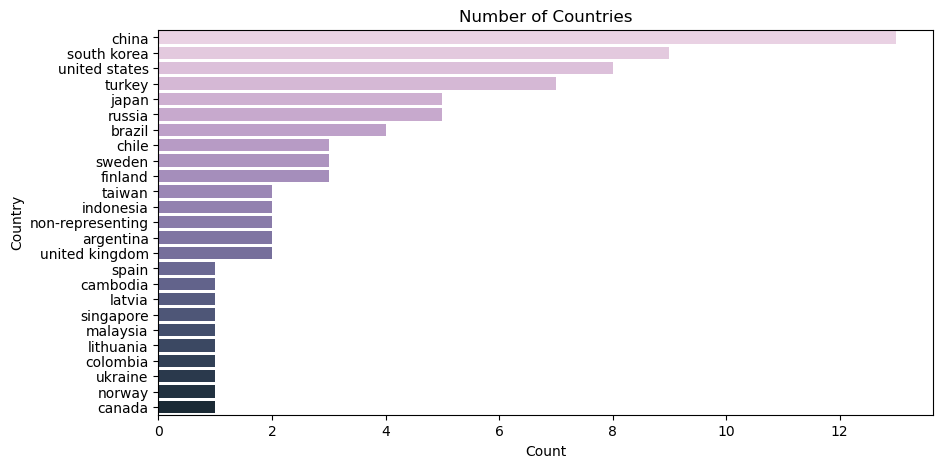

In [33]:
# import library
import seaborn as sns
import matplotlib.pyplot as plt

# Data
country_counts = df['Country'].value_counts()

# Convert the Series to a DataFrame
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['Country', 'Count']

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.title("Number of Countries")
ax = sns.barplot(x="Count", y="Country", data=country_counts_df, palette="ch:start=2.5")
plt.xlabel('Count')
plt.ylabel('Country')

plt.show()


## Correlation Matrix
### To see the relationship KDA, ACS/Map, etc.

C:\Users\krise\AppData\Local\Temp\ipykernel_18332\786952558.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



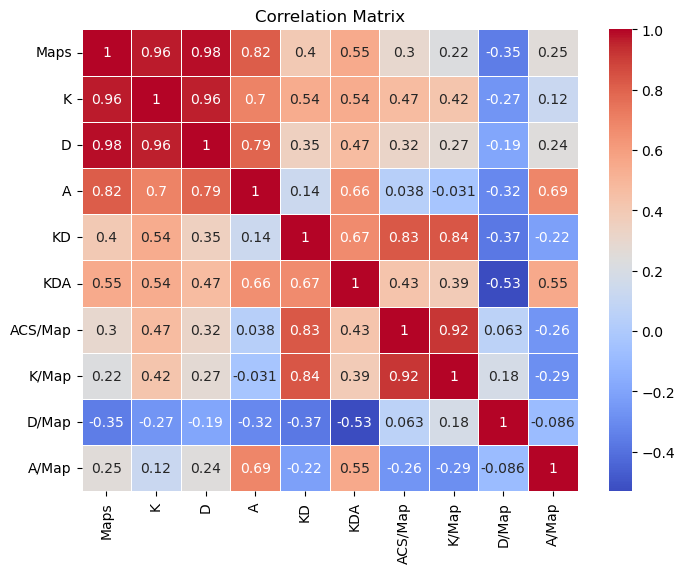

In [34]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Scatter Plot
### To see the player performance between having assist and non-assist

In [35]:
# import library
import plotly.graph_objs as go

# Create a table with the 'Player', 'KDA', and 'KD' columns
table = go.Figure(data=[go.Table(
    header=dict(values=['Player', 'KDA', 'KD']),
    cells=dict(values=[df['Player'], df['KDA'], df['KD']]))
])

# Show the table
table.show()

In [36]:
# install necessary packages
!pip install peakutils

In [37]:
# import library
import peakutils

# Extract columns from the dataset
playerkda = df['KDA']
players = df['Player']
plaerkd = df['KD']

# Convert 'KDA' and 'KD' to numpy arrays
playerkda = np.asarray(df['KDA'])
playerkd = np.asarray(df['KD'])

# Calculate the baseline for 'KDA' and 'KD'
baseline_kda = peakutils.baseline(playerkda)
baseline_kd = peakutils.baseline(playerkd)

# Create a scatter plot for the original 'KDA' values
trace1 = go.Scatter(
    x=np.arange(len(playerkda)),
    y=playerkda,
    mode='lines+markers',
    name='Original KDA',
    text=['Player: {}<br>KDA: {:.2f}'.format(player, kda) for player, kda in zip(players, playerkda)],
    hoverinfo='text'
)

# Create a scatter plot for the original 'KD' values
trace2 = go.Scatter(
    x=np.arange(len(playerkd)),
    y=playerkd,
    mode='lines+markers',
    name='Original KD',
    text=['Player: {}<br>KD: {:.2f}'.format(player, kd) for player, kd in zip(players, playerkd)],
    hoverinfo='text'
)

# Create a scatter plot for the baseline of 'KDA'
trace3 = go.Scatter(
    x=np.arange(len(baseline_kda)),
    y=baseline_kda,
    mode='lines',
    name='Baseline KDA'
)

# Create a scatter plot for the baseline of 'KD'
trace4 = go.Scatter(
    x=np.arange(len(baseline_kd)),
    y=baseline_kd,
    mode='lines',
    name='Baseline KD'
)

# Create the figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4])

# Set the layout
fig.update_layout(
    title='KDA and KD with Baseline',
    xaxis_title='Index',
    yaxis_title='Value'
)

# Show the figure
fig.show()

## Bar Plot - Top Assist Player aka potential Supporter

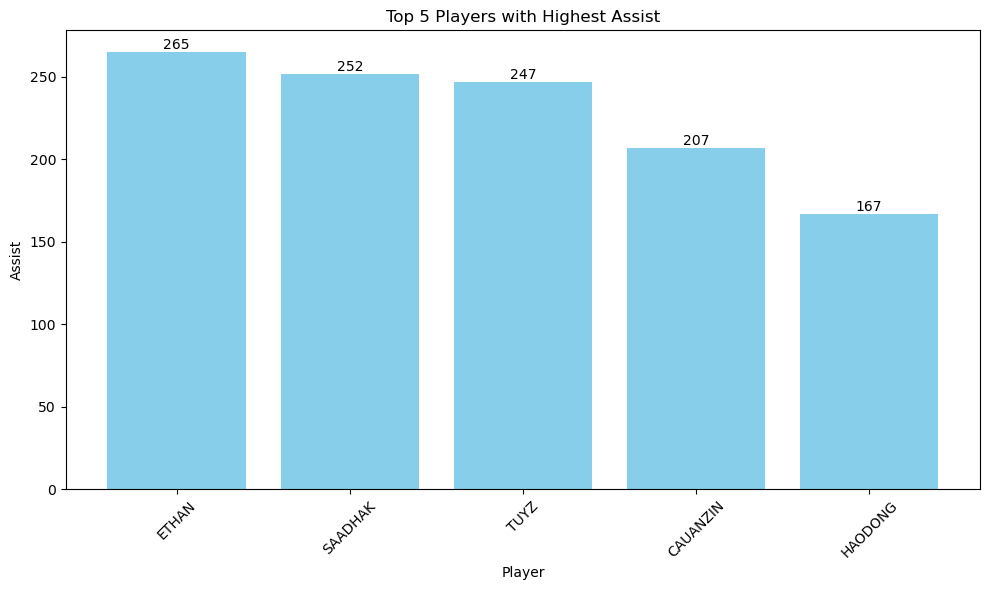

In [38]:
# Extract columns from the dataset but with 5 players
top_5_assist = df.nlargest(5, 'A')

# Plot a bar chart
plt.figure(figsize=(10, 6))

# Plot the bars and annotate with assist values
bars = plt.bar(top_5_assist['Player'], top_5_assist['A'], color='skyblue')

# Add assist values as annotations on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Player')
plt.ylabel('Assist')
plt.title('Top 5 Players with Highest Assist')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

## Pie Chart - Top Performance Player aka potential Duelist

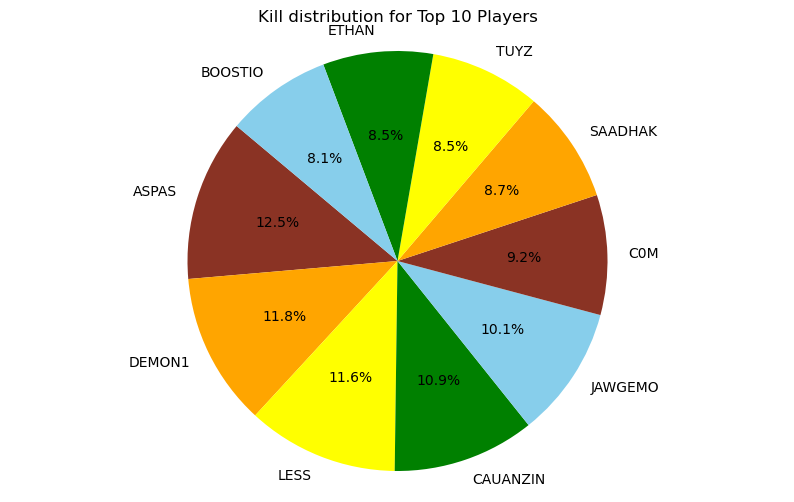

In [39]:
# Extract columns from the dataset but with 10 players
top_10_kill = df.nlargest(10, 'K')

# Data for the pie chart
labels = top_10_kill['Player']
sizes = top_10_kill['K']
colors = ['#8A3324', 'orange', 'yellow', 'green', 'skyblue']

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Kill distribution for Top 10 Players')

# Show the plot
plt.show()

# Data Outliers

## Outliers for KDA

In [40]:
# Extract columns from the dataset
kda_column = df['KDA']

# Calculate the first quartile (Q1)
Q1_kda = kda_column.quantile(0.25)

# Calculate the third quartile (Q3)
Q3_kda = kda_column.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR_kda = Q3_kda - Q1_kda

# Define the lower and upper bounds for outliers
lower_bound_kda = Q1_kda - 1.5 * IQR_kda
upper_bound_kda = Q3_kda + 1.5 * IQR_kda

# Identify outliers based on the lower and upper bounds
outliers_kda = kda_column[(kda_column < lower_bound_kda) | (kda_column > upper_bound_kda)]

# Replace outliers with the median of KDA
median_kda = df['KDA'].median()
df.loc[(df['KDA'] < lower_bound_kda) | (df['KDA'] > upper_bound_kda), 'KDA'] = median_kda

# Display the outliers
print("Outliers in KDA:")
print(outliers_kda)


Outliers in KDA:
28    2.17
Name: KDA, dtype: float64


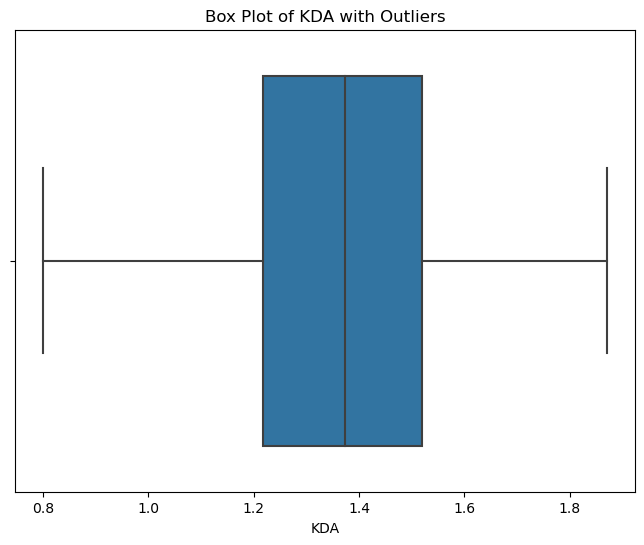

In [42]:
# Create a box plot for 'ACS/Map'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['KDA'])

plt.xlabel('KDA')
plt.title('Box Plot of KDA with Outliers')
plt.show()

## Outliers for Kill

In [43]:
# Extract columns from the dataset
k_column = df['K']

# Calculate the first quartile (Q1)
Q1 = k_column.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = k_column.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the lower and upper bounds
outliers = k_column[(k_column < lower_bound) | (k_column > upper_bound)]

# Replace outliers with the median of ACS/Map
median_k = df['K'].median()
df.loc[(df['K'] < lower_bound) | (df['K'] > upper_bound), 'K'] = median_k

# Display the outliers
print("Outliers in Kill:")
print(outliers)

Outliers in Kill:
3    446
Name: K, dtype: int64


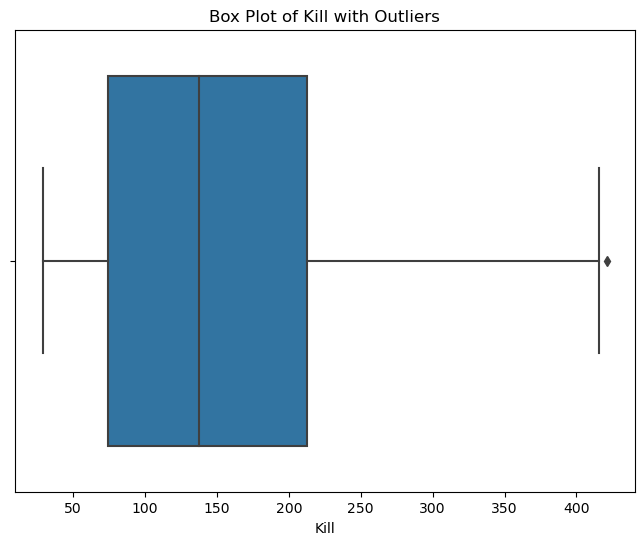

In [44]:
# Create a box plot for 'Kill'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['K'])

plt.xlabel('Kill')
plt.title('Box Plot of Kill with Outliers')
plt.show()

# Modelling Prediction Performance Player Combat and Player Assist

## Logistic Regression - Combat aka potential duelist

In [53]:
# Import necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Redefine exceptional player criteria based on KD, Kill and ACS/Map thresholds
# Adjust the thresholds based on your criteria for exceptional players
kd_threshold = 1.0
k_threshold = 15.0
acs_threshold = 210

# Redefine the target variable: 1 if exceptional, 0 if not
df['Exceptional'] = ((df['KD'] >= kd_threshold) & (df['K/Map'] >= k_threshold) & (df['ACS/Map'] >= acs_threshold)).astype(int)

# Check the updated distribution of the target variable 'Exceptional'
print("Updated Distribution of 'Exceptional':")
print(df['Exceptional'].value_counts())

# Extract relevant features and target
X = df[['KD', 'K/Map', 'ACS/Map']]
y = df['Exceptional']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0) # Adjusted parameter for testing sets, and seeds

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict whether each player is exceptional based on the model
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Use the model to predict whether a specific player is exceptional
# Example: predict if player with KD=1, K=12 and ACS/Map=270 is exceptional
player_data = [[1, 12, 270]]
predicted_label = model.predict(player_data)
print("\nPredicted Label for the Player:", predicted_label)

Updated Distribution of 'Exceptional':
0    58
1    22
Name: Exceptional, dtype: int64

Model Evaluation:
Accuracy: 0.9464285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.93      0.87      0.90        15

    accuracy                           0.95        56
   macro avg       0.94      0.92      0.93        56
weighted avg       0.95      0.95      0.95        56


Predicted Label for the Player: [1]


C:\Users\krise\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



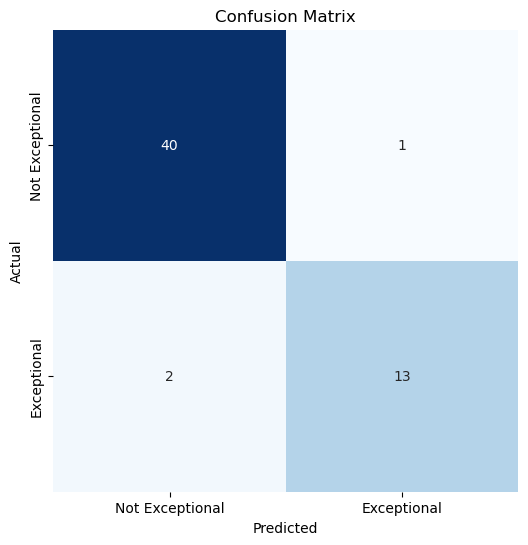

In [54]:
#Import necessary library
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Exceptional', 'Exceptional'],
            yticklabels=['Not Exceptional', 'Exceptional'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

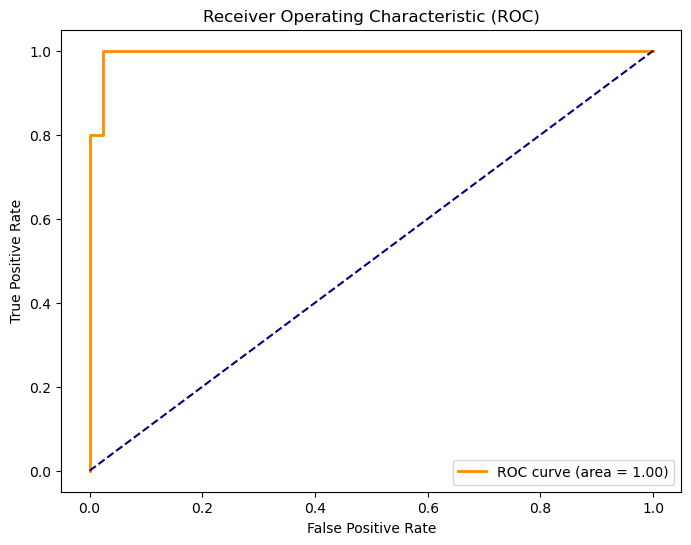

In [55]:
#Import necessary library
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [56]:
# Extract columns from dataset for prediction (KD, K/Map and ACS/Map)
X_players = df[['KD', 'K/Map', 'ACS/Map']]

# Predict whether each player is exceptional based on the model
predicted_labels = model.predict(X_players)

# Filter out the players predicted as exceptional
exceptional_players = df[predicted_labels == 1]
non_exceptional_players = df[predicted_labels == 0]

# Sort exceptional players by performance (KD, K/Map and ACS/Map) from top to bottom
sorted_exceptional_players = exceptional_players.sort_values(by=['KD', 'K/Map', 'ACS/Map'], ascending=False)

# Sort non-exceptional players by performance (KD, K/Map and ACS/Map) from top to bottom
sorted_non_exceptional_players = non_exceptional_players.sort_values(by=['KD', 'K/Map', 'ACS/Map'], ascending=False)

# Display the sorted exceptional players and their Agents
print("Exceptional Players Sorted by Performance (KD, K/Map and ACS/Map) from Top to Bottom:")
print(sorted_exceptional_players[['Player', 'Agents', 'KD', 'K/Map', 'ACS/Map']])

# Display the sorted non-exceptional players and their Agents
print("\nNon-Exceptional Players Sorted by Performance (KD, K/Map and ACS/Map) from Top to Bottom:")
print(sorted_non_exceptional_players[['Player', 'Agents', 'KD', 'K/Map', 'ACS/Map']])

Exceptional Players Sorted by Performance (KD, K/Map and ACS/Map) from Top to Bottom:
        Player                            Agents    KD  K/Map  ACS/Map
2       DEMON1      ['jett', 'astra', 'chamber']  1.39   20.0      246
6      ALFAJER  ['killjoy', 'cypher', 'chamber']  1.38   16.6      232
7        AAAAY                 ['skye', 'gekko']  1.33   19.0      231
3        ASPAS                  ['raze', 'jett']  1.25   18.5      235
17        CNED          ['jett', 'neon', 'sage']  1.20   20.3      220
11        LESS              ['killjoy', 'viper']  1.20   17.3      227
1          WHZ                  ['raze', 'jett']  1.17   19.2      254
18       DERKE                  ['raze', 'jett']  1.14   14.7      218
0       KEZNIT                  ['raze', 'jett']  1.12   19.7      266
5       ARDIIS    ['jett', 'chamber', 'killjoy']  1.12   17.6      232
19    CAUANZIN          ['skye', 'fade', 'sova']  1.12   16.2      217
8   SAYAPLAYER                  ['jett', 'raze']  1.11   17.5 

## Random Forest - Combat aka potential duelist# 

In [57]:
# Import necessary library
from sklearn.ensemble import RandomForestClassifier

# Redefine exceptional player criteria based on KDA, Assist and A/Map thresholds
# Adjust the thresholds based on your criteria for exceptional players
kda_threshold = .7
a_threshold = 120
a_map_threshold = 5.5

df['Exceptional Assist'] = ((df['KDA'] >= kda_threshold) & (df['A'] >= a_threshold) & (df['A/Map'] >= a_map_threshold)).astype(int)

# Check the updated distribution of the target variable 'Exceptional'
print("Updated Distribution of 'Exceptional Assist':")
print(df['Exceptional Assist'].value_counts())

# Extract relevant features and target
X = df[['KDA', 'A', 'A/Map']]
y = df['Exceptional Assist']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0) # Adjusted parameter for testing sets, and seeds

# Train a Random Forest Classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict whether each player is exceptional based on the model
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Use the model to predict whether a specific player is exceptional
# Example: predict if player with KDA=2.3, A=320, and A/Map=2.1 is exceptional
player_data = [[2.3, 320, 2.1]]
predicted_label = rf_model.predict(player_data)
print("\nPredicted Label for the Player:", predicted_label)


Updated Distribution of 'Exceptional Assist':
0    69
1    11
Name: Exceptional Assist, dtype: int64

Model Evaluation:
Accuracy: 0.9821428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.86      0.92         7

    accuracy                           0.98        56
   macro avg       0.99      0.93      0.96        56
weighted avg       0.98      0.98      0.98        56


Predicted Label for the Player: [1]


C:\Users\krise\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



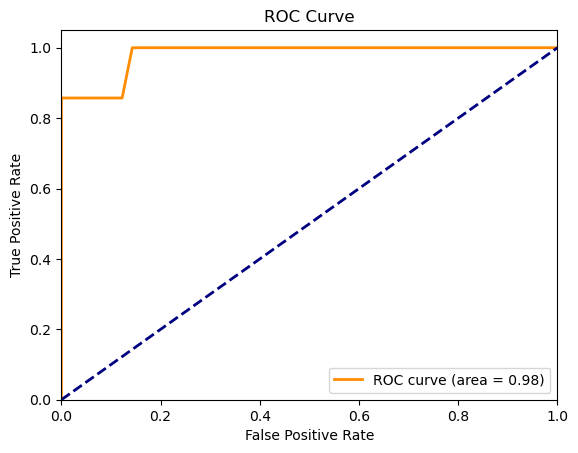

In [58]:
# Import necessary library
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


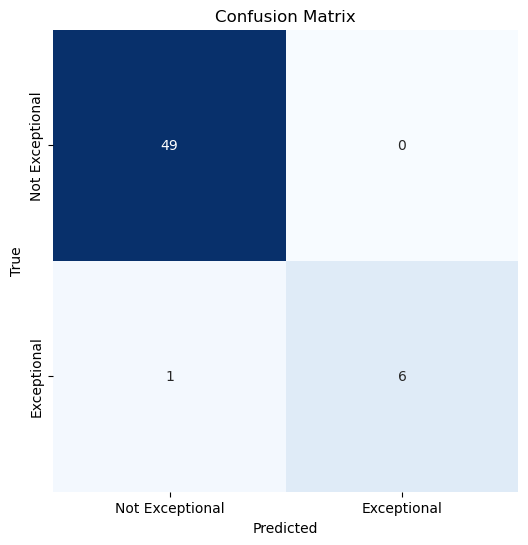

In [59]:
# Import necessary library
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Exceptional', 'Exceptional'],
            yticklabels=['Not Exceptional', 'Exceptional'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [60]:
# Extract columns fromt the dataset for prediction (KDA, Assist and A/Map)
X_players = df[['KDA', 'A', 'A/Map']]

# Predict whether each player is exceptional based on the model
predicted_labels = rf_model.predict(X_players)

# Filter out the players predicted as exceptional
exceptional_players = df[predicted_labels == 1]
non_exceptional_players = df[predicted_labels == 0]

# Sort exceptional players by performance (KDA, Assist and A/Map) from top to bottom
sorted_exceptional_players = exceptional_players.sort_values(by=['KDA', 'A', 'A/Map'], ascending=False)

# Sort non-exceptional players by performance (KDA, Assist and A/Map) from top to bottom
sorted_non_exceptional_players = non_exceptional_players.sort_values(by=['KDA', 'A', 'A/Map'], ascending=False)

# Display the sorted exceptional players and their Agents
print("Exceptional Assist Players Sorted by Performance (KD, K/Map and ACS/Map) from Top to Bottom:")
print(sorted_exceptional_players[['Player', 'Agents', 'KDA', 'A', 'A/Map']])

# Display the sorted non-exceptional players and their Agents
print("\nNon-Exceptional Assist Players Sorted by Performance (KD, K/Map and ACS/Map) from Top to Bottom:")
print(sorted_non_exceptional_players[['Player', 'Agents', 'KDA', 'A', 'A/Map']])

Exceptional Assist Players Sorted by Performance (KD, K/Map and ACS/Map) from Top to Bottom:
        Player                           Agents   KDA    A  A/Map
38       ETHAN        ['skye', 'kay/o', 'yoru']  1.87  265   12.6
41       D4V41     ['skye', 'viper', 'killjoy']  1.74  153    9.5
64        TUYZ      ['omen', 'astra', 'harbor']  1.73  247   10.2
44        MAKO            ['omen', 'brimstone']  1.73  145   11.1
19    CAUANZIN         ['skye', 'fade', 'sova']  1.71  207    8.6
37         C0M                ['sova', 'viper']  1.61  144    6.8
50     SAADHAK     ['breach', 'viper', 'kay/o']  1.58  252   10.5
9      JAWGEMO        ['raze', 'omen', 'astra']  1.58  154    7.3
63  MINDFREAK   ['astra', 'viper', 'brimstone']  1.57  132    8.2
61     HAODONG   ['omen', 'brimstone', 'astra']  1.49  167   10.4

Non-Exceptional Assist Players Sorted by Performance (KD, K/Map and ACS/Map) from Top to Bottom:
        Player                           Agents   KDA    A  A/Map
58         S0M  [